In [23]:
import pandas as pd
import zipfile

zip_file = 'house-prices-advanced-regression-techniques.zip'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('house-prices')

csv_file = 'house-prices/train.csv'  # Modify if needed
df = pd.read_csv(csv_file)

print(df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [9]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

df = df[features + [target]]

In [11]:
df = df.dropna()  # Dropping rows with missing values

In [13]:
from sklearn.model_selection import train_test_split

X = df[features]  
y = df[target]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2806426667.247852
R-squared: 0.6341189942328374


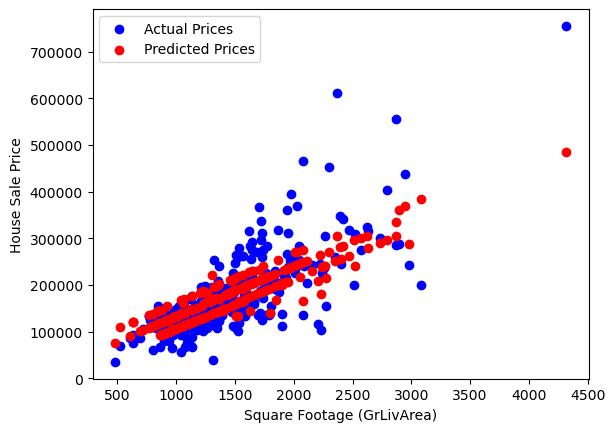

In [21]:
import matplotlib.pyplot as plt

plt.scatter(X_test['GrLivArea'], y_test, color='blue', label='Actual Prices')
plt.scatter(X_test['GrLivArea'], y_pred, color='red', label='Predicted Prices')
plt.xlabel('Square Footage (GrLivArea)')
plt.ylabel('House Sale Price')
plt.legend()
plt.show()